In [124]:
import pandas as pd
import numpy as np
import math

from scipy import stats
from scipy.stats import reciprocal, uniform

import seaborn as sns
import matplotlib.pyplot as plt

import plotnine
from plotnine import *
from plotnine.data import *
%matplotlib inline

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn import preprocessing
from sklearn.utils import shuffle, resample
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score, cross_validate

from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTENC , RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, precision_recall_fscore_support, make_scorer
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, roc_curve, roc_auc_score
from sklearn.metrics import classification_report

from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

import time

from statsmodels.stats.contingency_tables import mcnemar


## Importing dataframe and making a 70/30 test train split and running a decision tree to get baseline parameters

### Import dataset after initial processing form R

In [3]:
mydata0 = pd.read_csv("no_norm_df.csv")
mydata1 = pd.read_csv("norm_df.csv")

mydata_no_norm=mydata0.copy()
mydata_norm=mydata1.copy()

In [4]:
mydata_no_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 34 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   int64  
 1   AC        2126 non-null   int64  
 2   FM        2126 non-null   int64  
 3   UC        2126 non-null   int64  
 4   ASTV      2126 non-null   int64  
 5   MSTV      2126 non-null   float64
 6   ALTV      2126 non-null   int64  
 7   MLTV      2126 non-null   float64
 8   DL        2126 non-null   int64  
 9   DS        2126 non-null   int64  
 10  DP        2126 non-null   int64  
 11  Width     2126 non-null   int64  
 12  Min       2126 non-null   int64  
 13  Max       2126 non-null   int64  
 14  Nmax      2126 non-null   int64  
 15  Nzeros    2126 non-null   int64  
 16  Mode      2126 non-null   int64  
 17  Mean      2126 non-null   int64  
 18  Median    2126 non-null   int64  
 19  Variance  2126 non-null   int64  
 20  nPoints   2126 non-null   int6

### defining the label column, defining the feature columns

In [5]:
label_col=mydata_no_norm['NSP'] 
data_col=mydata_no_norm.iloc[:, 0:33]  

### splitting data into test train 70/30 split

In [6]:
X_train,X_test,y_train,y_test=train_test_split(data_col,label_col,test_size=0.3 ,random_state=42, stratify=label_col)

In [7]:
X_y_train_combined = pd.concat([X_train,y_train], axis=1) # combining independent and feature variables to write csv
X_y_test_combined = pd.concat([X_test,y_test], axis=1)
X_y_train_combined.to_csv('X_y_train_combined.csv',index=False) # writing csv to export back to R
X_y_test_combined.to_csv('X_y_test_combined.csv',index=False)

### defining decision tree with standard hyperparameters

In [8]:
dc_clf = tree.DecisionTreeClassifier(max_depth=5)

### fitting original imbalanced data to decision tree

In [9]:
dc_clf.fit(X_train, y_train)
y_pred = dc_clf.predict(X_test)

### plotting the confusion matrix, and classification report

****************************** DecisionTreeClassifier ******************************



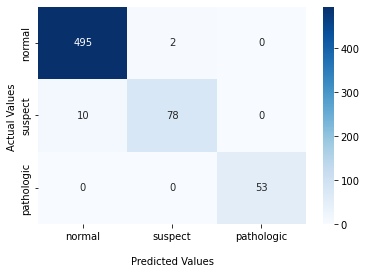



              precision    recall  f1-score   support

           1       0.98      1.00      0.99       497
           2       0.97      0.89      0.93        88
           3       1.00      1.00      1.00        53

    accuracy                           0.98       638
   macro avg       0.99      0.96      0.97       638
weighted avg       0.98      0.98      0.98       638
 



In [10]:
    
print("******************************",dc_clf.__class__.__name__,"******************************\n")

# create confusion matrix

cf_matrix = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(cf_matrix, annot=True, fmt='g', ax=None, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['normal', 'suspect','pathologic'])
ax.yaxis.set_ticklabels(['normal', 'suspect','pathologic'])

## Display the visualization of the Confusion Matrix.

plt.show()
print("\n")
print( classification_report(y_test,y_pred),"\n")  

## Since the data set has perfect f1 and recall for class 3, the morphological classification columns by experts and the machine reported numbers are investigated seperately

### Investigating morphological parameters first

In [11]:
label_col=mydata_no_norm['NSP'] 
data_col=mydata_no_norm.iloc[:, 22:33]  
data_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       2126 non-null   int64
 1   B       2126 non-null   int64
 2   C       2126 non-null   int64
 3   D       2126 non-null   int64
 4   E       2126 non-null   int64
 5   AD      2126 non-null   int64
 6   DE      2126 non-null   int64
 7   LD      2126 non-null   int64
 8   FS      2126 non-null   int64
 9   SUSP    2126 non-null   int64
 10  CLASS   2126 non-null   int64
dtypes: int64(11)
memory usage: 182.8 KB


### splitting, training and testing morphological data

****************************** DecisionTreeClassifier ******************************



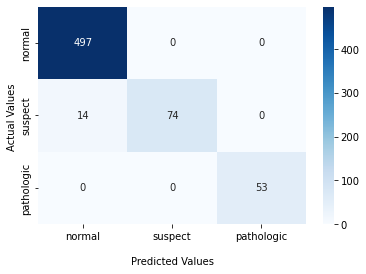



              precision    recall  f1-score   support

           1       0.97      1.00      0.99       497
           2       1.00      0.84      0.91        88
           3       1.00      1.00      1.00        53

    accuracy                           0.98       638
   macro avg       0.99      0.95      0.97       638
weighted avg       0.98      0.98      0.98       638
 



In [12]:
X_train,X_test,y_train,y_test=train_test_split(data_col,label_col,test_size=0.3 ,random_state=42, stratify=label_col)

#dc_clf = tree.DecisionTreeClassifier(max_depth=5)

dc_clf.fit(X_train, y_train)
y_pred = dc_clf.predict(X_test)

print("******************************",dc_clf.__class__.__name__,"******************************\n")

# create confusion matrix

cf_matrix = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(cf_matrix, annot=True, fmt='g', ax=None, cmap='Blues')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['normal', 'suspect','pathologic'])
ax.yaxis.set_ticklabels(['normal', 'suspect','pathologic'])

## Display the visualization of the Confusion Matrix.

plt.show()
print("\n")
print( classification_report(y_test,y_pred),"\n")  

## We can see the morphological data can prodict class 3 with 100% accuracy. This maybe becasue the human morphological classification was heavily weighed on when assigining the final fetal NSP risk category

### Now investigating the machine reported parameters only

In [13]:
label_col=mydata_no_norm['NSP'] 
data_col=mydata_no_norm.iloc[:, 0:22]  
data_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2126 non-null   int64  
 1   AC        2126 non-null   int64  
 2   FM        2126 non-null   int64  
 3   UC        2126 non-null   int64  
 4   ASTV      2126 non-null   int64  
 5   MSTV      2126 non-null   float64
 6   ALTV      2126 non-null   int64  
 7   MLTV      2126 non-null   float64
 8   DL        2126 non-null   int64  
 9   DS        2126 non-null   int64  
 10  DP        2126 non-null   int64  
 11  Width     2126 non-null   int64  
 12  Min       2126 non-null   int64  
 13  Max       2126 non-null   int64  
 14  Nmax      2126 non-null   int64  
 15  Nzeros    2126 non-null   int64  
 16  Mode      2126 non-null   int64  
 17  Mean      2126 non-null   int64  
 18  Median    2126 non-null   int64  
 19  Variance  2126 non-null   int64  
 20  nPoints   2126 non-null   int6

### splitting, training and testing machine reported data

****************************** DecisionTreeClassifier ******************************



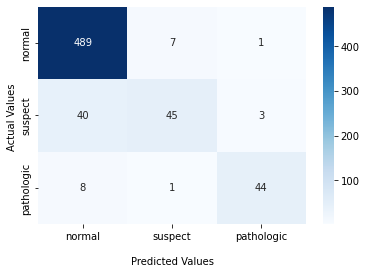



              precision    recall  f1-score   support

           1       0.91      0.98      0.95       497
           2       0.85      0.51      0.64        88
           3       0.92      0.83      0.87        53

    accuracy                           0.91       638
   macro avg       0.89      0.78      0.82       638
weighted avg       0.90      0.91      0.90       638
 

****************************** RandomForestClassifier ******************************



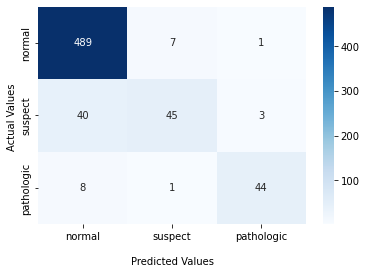



              precision    recall  f1-score   support

           1       0.91      0.98      0.95       497
           2       0.85      0.51      0.64        88
           3       0.92      0.83      0.87        53

    accuracy                           0.91       638
   macro avg       0.89      0.78      0.82       638
weighted avg       0.90      0.91      0.90       638
 

****************************** SVC ******************************



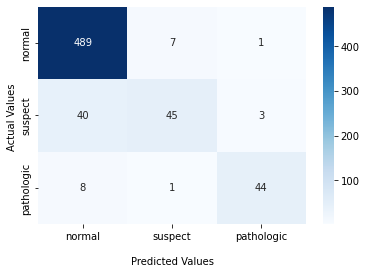



              precision    recall  f1-score   support

           1       0.91      0.98      0.95       497
           2       0.85      0.51      0.64        88
           3       0.92      0.83      0.87        53

    accuracy                           0.91       638
   macro avg       0.89      0.78      0.82       638
weighted avg       0.90      0.91      0.90       638
 



In [51]:

X_train,X_test,y_train,y_test=train_test_split(data_col,label_col,test_size=0.3 ,random_state=42, stratify=label_col)

dc_clf = tree.DecisionTreeClassifier()
rnd_clf=RandomForestClassifier()
svm_clf=SVC()

# training and testing CTG meachine only data with the classifiers

for clf in (dc_clf, rnd_clf, svm_clf):#, xgb_clf):

    clf.fit(X_train, y_train)# fitting original imbalanced without expert data
    y_pred2 = clf.predict(X_test)
    
    print("******************************",clf.__class__.__name__,"******************************\n")
    
    cf_matrix = confusion_matrix(y_test,y_pred)
    ax = sns.heatmap(cf_matrix, annot=True, fmt='g', ax=None, cmap='Blues')
    #ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['normal', 'suspect','pathologic'])
    ax.yaxis.set_ticklabels(['normal', 'suspect','pathologic'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()
    print("\n")
    
    #print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    #print(clf.__class__.__name__, recall_score(y_test,y_pred,average="weighted"))
    #print(clf.__class__.__name__, precision_score(y_test,y_pred,average='weighted'))
    print( classification_report(y_test,y_pred),"\n")   

## We can see the machine data can predict class 3 with 80-89% F1 score and recall in the 80-89%, and overall accuracy in the low 90% when applied without any modification on a simple decision tree

### So the following steps will consist of optimizing the data and the model

## These are functions to preocess the data for classification


### The get imbalanced deired n finction takes in data provides the data imbalabce as out put and also provides the number of samples needed in each class to create a new desired imbalance

In [15]:
def get_imbalance_desired_n(y_train, imbalance_desired):
    """
    Outputs the number of total target class instances that needed after upsampling to maintain 
    the desired imbalance.
    """
    C=3
    tTdata=len(y_train)

    tn1=len(y_train.index[y_train.eq(1)])
    tn2=len(y_train.index[y_train.eq(2)])
    tn3=len(y_train.index[y_train.eq(3)])
    
    timbalanceStat=abs(((1/C)-(tn1/tTdata)))+abs(((1/C)-(tn2/tTdata)))+abs(((1/C)-(tn3/tTdata)))

    # assuming desired n2 = n3
    desired_n3 = -(((imbalance_desired-abs(1/C-tn1/tTdata))/2)-1/C)*tTdata
    #print("Number of instances of NSP = 3 desired in the training data is",round(desired_n3,0),"to maintain an imbalance stat of",imbalanceStatDesired)
    #fraction = desired_n3/tn1
    return(timbalanceStat, int(tn1), int(max(tn2,round(desired_n3,0))), int(max(tn3,round(desired_n3,0))))

### The score model function Creates folds based on cv splits, upsamples to desired imbalance within each train fold. Does 10 fold cross validation and reteruns validation scores

In [17]:
def score_model(model, X_train, y_train, params, cv, my_rand, sampStrat, imbalance_desired):
    """
    Validation of model Creates folds based on cv splits, upsamples to desired imbalance within each train fold.
    Does 10 fold cross validation and reteruns validation scores
    Returns an array of validation scores
    """
    _, N1, N2, N3 =get_imbalance_desired_n(y_train, imbalance_desired)
    N1=int(math.ceil(N1*9/10))
    N2=int(math.ceil(N2*9/10))
    N3=int(math.ceil(N3*9/10))
    
    sampling_strategy1 = {1: N1, 2: N2, 3: N3}
    sampling_strategy2 = {1: N2, 2: N2, 3: N3}
    
    smoter = SMOTENC(sampling_strategy=sampling_strategy1,categorical_features=[20], 
                     random_state=my_rand+1) # over sampling using SMOTE-NC
    rus = RandomUnderSampler(sampling_strategy=sampling_strategy2,random_state=my_rand+1, 
                             replacement=False)# fit predictor and target variable
    ros = RandomOverSampler(sampling_strategy=sampling_strategy1, random_state=my_rand+1)

# fit predictor and target variablex_ros, y_ros = ros.fit_resample(x, y)
    
    foldScoresf1 = []
    foldScoresRecall = []
    foldScoresPrecision = []
    foldScoresAccuracy = []
    
    for train_fold_index, val_fold_index in cv.split(X_train, y_train): 
        # Get the training data
        X_train_fold, y_train_fold = X_train.iloc[train_fold_index], y_train.iloc[train_fold_index]
        # Get the validation data
        X_val_fold, y_val_fold = X_train.iloc[val_fold_index], y_train.iloc[val_fold_index]
        
        if (sampStrat == 'SMOTENC'):
            # Upsample only the data in the training fold 
            X_train_fold_upsample, y_train_fold_upsample = smoter.fit_resample(X_train_fold, y_train_fold)
        if (sampStrat == 'rus-ros'):
            # Upsample then down sample
            X_train_fold_upsample, y_train_fold_upsample = ros.fit_resample(X_train_fold, y_train_fold)         
            X_train_fold_upsample, y_train_fold_upsample = rus.fit_resample(X_train_fold_upsample, y_train_fold_upsample)
        if (sampStrat == 'ros'):
            # Upsample only the data in the training fold 
            X_train_fold_upsample, y_train_fold_upsample = ros.fit_resample(X_train_fold, y_train_fold)         
            
        
        # Fit the model on the upsampled training data
        model_obj = model(**params).fit(X_train_fold_upsample, y_train_fold_upsample)
        y_val_fold_pred = model_obj.predict(X_val_fold)
        
        # Score the model on the (non-upsampled) validation data
           
        foldScoresf1.append(f1_score(y_val_fold, y_val_fold_pred, average=None)[2])
        foldScoresRecall.append(recall_score(y_val_fold, y_val_fold_pred, average=None)[2])
        foldScoresPrecision.append(precision_score(y_val_fold, y_val_fold_pred, average=None)[2])
        foldScoresAccuracy.append(accuracy_score(y_val_fold, y_val_fold_pred))
        #fpr[i], tpr[i], _ = roc_auc_score(y_val_fold, y_val_fold_pred)
        

    mean_scores=[np.mean(foldScoresf1), np.mean(foldScoresRecall), np.mean(foldScoresAccuracy), 
                 np.mean(foldScoresPrecision)]   
    return np.array(mean_scores)

### the get opt hyperparam uses grid search loops to get the optimised hyperparameters based on highest 10x cross validation score

In [18]:
def get_opt_hyperparam(clf, X_train, y_train, kf, my_rand,sampStrat, imbalance_desired):
    """
    Creates parameters customized to each model. Assigns parameter values to be investigated.
    Calls the score_model function to get validation scores of a 10 x cross validation.
    Returns the hyper parameter combinations with best validation score, and the optimized model.
    """
    
    if clf.__class__.__name__ == 'DecisionTreeClassifier':
        params = {'max_depth': [4, 6, 12],
                  'criterion': ["entropy"]} 
        score_tracker = []
        for criterion in params['criterion']:
            for max_depth in params['max_depth']:
                example_params = {'criterion': criterion,'max_depth': max_depth,'random_state': my_rand}    
                model_scores = score_model(DecisionTreeClassifier, X_train, y_train, example_params, kf, my_rand,sampStrat, imbalance_desired)                  
                example_params['validation precision'] = model_scores[3]
                example_params['validation recall'] = model_scores[1]   
                example_params['validation f1'] = model_scores[0]
                example_params['validation accuracy'] = model_scores[2]
                score_tracker.append(example_params)
        best_params=sorted(score_tracker, key=lambda x: x['validation accuracy'], reverse=True)[0]            
        clf_tuned = DecisionTreeClassifier(criterion=best_params.get("criterion"), 
                                           max_depth=best_params.get("max_depth"), random_state=my_rand)
        
    elif clf.__class__.__name__ == 'RandomForestClassifier':  
        params = {'n_estimators': [10, 100, 200],
                  'max_depth': [4, 6, 12]}        
        score_tracker = []
        for n_estimators in params['n_estimators']:
            for max_depth in params['max_depth']:
                example_params = {'n_estimators': n_estimators,'max_depth': max_depth,'random_state': my_rand}    
                model_scores = score_model(RandomForestClassifier, X_train, y_train, example_params, kf, my_rand, sampStrat, imbalance_desired)                  
                example_params['validation precision'] = model_scores[3]
                example_params['validation recall'] = model_scores[1]   
                example_params['validation f1'] = model_scores[0]
                example_params['validation accuracy'] = model_scores[2]
                score_tracker.append(example_params)
        best_params=sorted(score_tracker, key=lambda x: x['validation accuracy'], reverse=True)[0]            
        clf_tuned = RandomForestClassifier(n_estimators=best_params.get("n_estimators"), 
                                           max_depth=best_params.get("max_depth"), random_state=my_rand)

    
    elif clf.__class__.__name__ == 'SVC':        
        params = {'kernel': ['linear','rbf'], # C is the penalty of misclassification,larger C = a smaller margin 
                  'C': [0.001, 0.01]} #(kernel="poly",degree=6,coef0=5,gamma=0.1)'kernel':('linear', 'rbf')'rbf'
        score_tracker = []
        for kernel in params['kernel']:
            for C in params['C']:
                example_params = {'kernel': kernel, 'C': C,'random_state': my_rand}    
                model_scores = score_model(SVC, X_train, y_train, example_params, kf, my_rand,sampStrat, imbalance_desired)                  
                example_params['validation precision'] = model_scores[3]
                example_params['validation recall'] = model_scores[1]   
                example_params['validation f1'] = model_scores[0]
                example_params['validation accuracy'] = model_scores[2]
                score_tracker.append(example_params)
        best_params=sorted(score_tracker, key=lambda x: x['validation accuracy'], reverse=True)[0]            
        clf_tuned = SVC(C=best_params.get("C"), kernel=best_params.get("kernel"),
                                           random_state=my_rand)
        
    elif clf.__class__.__name__ == 'XGBClassifier':
        params = {'n_estimators': [10, 75, 200],
                  'max_depth': [4, 10, 100]} #(learning_rate=0.001, verbosity = 0)

    else:        
        return (None, None)  
    
    send_params={'hyper_param_tuning': None}
    send_params['hyper_param_tuning']={k: best_params[k] for k in best_params.keys() - {'validation precision',
                                                                                    'validation recall',
                                                                                    'validation f1',
                                                                                    'validation accuracy'}}
    send_params['validation precision']=best_params['validation precision']   
    send_params['validation recall']=best_params['validation recall'] 
    send_params['validation f1']=best_params['validation f1'] 
    send_params['validation accuracy']=best_params['validation accuracy'] 
    return (clf_tuned, send_params)

### the get data test the classifiers based on the optimized model, the training sample is upsampled by the desired imbalance using the umpamloing techniques SMOTE NC , random upsampling, random upsampling and random downsampling, and then the optimized model is fit to with it. Then the test data is used to get the test scores (test data is not upsampled)

In [19]:
def get_data(clf, X_train, y_train, X_test, y_test, kf, imbalance, imbalance_desired, sampStrat, my_rand):
    """
    Calls the get_opt_hyperparam function to get optimized hyperparameters, validation scores, 
    and tuned model.
    Then trains the tuned model using the upsampled training data
    (upsample the train data to the desired imbalance value).
    Then performs test on the trained model.
    Returns the best hyper parameter combinations, validation scores, train upsampling amount (imbalance))
    , and test scores.
    """
        
    if sampStrat=='SMOTENC':
        _, N1, N2, N3 =get_imbalance_desired_n(y_train, imbalance_desired)
        sampling_strategy = {1: N1, 2: N2, 3: N3}
        # get optimized model and validation stats
        clf_tuned, params = get_opt_hyperparam(clf, X_train, y_train, kf, my_rand, sampStrat, imbalance_desired)
        X_train_upsample, y_train_upsample = SMOTENC(sampling_strategy =sampling_strategy, categorical_features=[20],
                                                     random_state=my_rand).fit_resample(X_train, y_train)
        # fit optimized model with no upsampled train data
        clf_tuned.fit(X_train_upsample, y_train_upsample)
        # test model with test data
        y_pred = clf_tuned.predict(X_test)
        # store all parametes and scores
        params['test precision']=precision_score(y_test, y_pred,average=None)[2]
        params['test recall']=recall_score(y_test, y_pred,average=None)[2]
        params['test f1']=f1_score(y_test, y_pred, average=None)[2]
        params['test accuracy']=accuracy_score(y_test, y_pred)
        params['sampling'] = sampStrat
        params['sampling_strategy'] = [{1: N1, 2: N2, 3: N3}]
        params['test imbalance'] = imbalance_desired
        params['model name'] = clf_tuned.__class__.__name__
        params['y_pred']=y_pred

    if sampStrat=='rus-ros':
        _, N1, N2, N3 =get_imbalance_desired_n(y_train, imbalance_desired)

        sampling_strategy1 = {1: N1, 2: N2, 3: N3}
        sampling_strategy2 = {1: N2, 2: N2, 3: N3}
        # get optimized model and validation stats
        clf_tuned, params = get_opt_hyperparam(clf, X_train, y_train, kf, my_rand, sampStrat, imbalance_desired) 
        X_train_upsample, y_train_upsample = RandomOverSampler(sampling_strategy =sampling_strategy1, 
                                                               random_state=my_rand).fit_resample(X_train, y_train)
        X_train_downsample, y_train_downsample = RandomUnderSampler(sampling_strategy =sampling_strategy2, 
                                                                random_state=my_rand,
                                                                replacement=False).fit_resample(X_train_upsample, y_train_upsample)
        clf_tuned.fit(X_train_downsample, y_train_downsample)
        # test model with test data
        y_pred = clf_tuned.predict(X_test)
        # store all parametes and scores
        params['test precision']=precision_score(y_test, y_pred,average=None)[2]
        params['test recall']=recall_score(y_test, y_pred,average=None)[2]
        params['test f1']=f1_score(y_test, y_pred, average=None)[2]
        params['test accuracy']=accuracy_score(y_test, y_pred)
        params['sampling'] = sampStrat
        params['sampling_strategy'] = [{1: N3, 2: N2, 3: N3}]
        new_imb, _, _, _ = get_imbalance_desired_n(y_train_downsample, imbalance_desired)
        params['test imbalance'] = new_imb
        params['model name'] = clf_tuned.__class__.__name__
        params['y_pred']=y_pred
        
    if sampStrat=='ros':
        _, N1, N2, N3 =get_imbalance_desired_n(y_train, imbalance_desired)
        sampling_strategy = {1: N1, 2: N2, 3: N3}
        # get optimized model and validation stats
        clf_tuned, params = get_opt_hyperparam(clf, X_train, y_train, kf, my_rand, sampStrat, imbalance_desired)   
        X_train_upsample, y_train_upsample = RandomOverSampler(sampling_strategy =sampling_strategy, random_state=my_rand).fit_resample(X_train, y_train)
        clf_tuned.fit(X_train_upsample, y_train_upsample)
        # test model with test data
        y_pred = clf_tuned.predict(X_test)
        # store all parametes and scores
        params['test precision']=precision_score(y_test, y_pred,average=None)[2]
        params['test recall']=recall_score(y_test, y_pred,average=None)[2]
        params['test f1']=f1_score(y_test, y_pred, average=None)[2]
        params['test accuracy']=accuracy_score(y_test, y_pred) 
        params['sampling'] = sampStrat
        params['sampling_strategy'] = [{1: N1, 2: N2, 3: N3}]
        params['test imbalance'] = imbalance_desired
        params['model name'] = clf_tuned.__class__.__name__
        params['y_pred']=y_pred
        
    return(params)

### main function instanciates all the classifiers, creates all the desired imbalance to be used, and declares all the sampling strategies that would be used, then calls the get data function to perform the validation train and test, stores the data as the loops of classifiers, imbalance desired and sampler tech progresses

In [22]:
def main_func (kf, my_rand, n_stat, X_train, y_train, X_test, y_test):
    """
    takes folds for cv, train and test data, random number, and normalization state.
    creates all classifiers to be evaluated, and all imbalances to be tested, and names all upsampling
    strategies then calls the get_data function to do cross validation and testing.

    before calling get_data function it also does an initial non hyperparameter tuned fit 
    with no upsampled train data and does an initial test fit.
    """

    datStore = []
    imbalance, _ , _ ,_ = get_imbalance_desired_n(y_train, 0)
    #desired data imbalance
    imbalance_desired = np.arange(imbalance, 0.00, -0.20)#[0.89, 0.69, 0.49, 0.29, 0.09]

    #-----------------------------------------------------------------------------------

    dc_clf = tree.DecisionTreeClassifier()
    rnd_clf=RandomForestClassifier()
    svm_clf=SVC()#kernel="poly",degree=6,coef0=5,gamma=0.1
    #xgb_clf=XGBClassifier(learning_rate=0.001, verbosity = 0)

    for clf in (dc_clf, rnd_clf, svm_clf):#, rnd_clf, svm_clf, xgb_clf):
   
        start = time.time()
        clf.fit(X_train, y_train)
        y_train_pred = clf. predict(X_train) 
        # test model with test data
        y_pred = clf.predict(X_test)


        # store all parametes and scores
        params={'hyper_param_tuning': 'none'}
        params['validation precision']= precision_score(y_train, y_train_pred,average=None)[2]
        params['validation recall']= recall_score(y_train, y_train_pred,average=None)[2]
        params['validation f1']= f1_score(y_train, y_train_pred, average=None)[2]
        params['validation accuracy']= accuracy_score(y_train, y_train_pred)
        params['test precision']= precision_score(y_test, y_pred,average=None)[2]
        params['test recall']= recall_score(y_test, y_pred,average=None)[2]
        params['test f1']= f1_score(y_test, y_pred, average=None)[2]
        params['test accuracy'] = accuracy_score(y_test, y_pred)  
        params['sampling'] = 'none'
        params['sampling_strategy'] = [{1: len(y_train.index[y_train.eq(1)]), 
                                        2: len(y_train.index[y_train.eq(2)]), 
                                        3: len(y_train.index[y_train.eq(3)])}]
        params['test imbalance'] = imbalance
        params['model name'] = clf.__class__.__name__
        params['y_pred']=y_pred
        params['normalization']=n_stat
        end = time.time()
        params['time']=end-start
        datStore.append(params)   

        for des_imb in range (0,len(imbalance_desired),1):
            for sampStrat in ('SMOTENC','ros','rus-ros'):

                start = time.time()
                #print("Start hello")
                output = get_data(clf, X_train, y_train, X_test, y_test, kf, 
                                  imbalance, imbalance_desired[des_imb], sampStrat, my_rand) 

                end = time.time()
                output['normalization']=n_stat
                output['time']=end-start
                datStore.append(output)
    
    return(datStore)

### This segment createds cross validation folds (which is propagated throughout the code to keep same data test train split so the re is no leakage between training and testing) based on a random number assigned
### this random number is propagated through out the codes to keep all sampling models as consistent between loops as possible
### Also tests the not normalised data and the min max normalised data
### stores all validationa and test scores for all variations

In [23]:
#-----------------------------------------------------------------------------------
my_rand = 42
# creating same folds everytime, 10 x fold
kf = StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

n_stat='no_norm'
label_col = mydata_no_norm['NSP'] 
data_col = mydata_no_norm.iloc[:, 0:22] 
X_train,X_test,y_train,y_test=train_test_split(data_col,label_col,test_size=0.3 ,
                                               random_state=my_rand, stratify=label_col)
datStore1 = main_func(kf,  my_rand, n_stat, X_train, y_train, X_test, y_test)

n_stat='norm'
label_col = mydata_norm['NSP'] 
data_col = mydata_norm.iloc[:, 0:22] 
X_train,X_test,y_train,y_test=train_test_split(data_col,label_col,test_size=0.3 ,
                                               random_state=my_rand, stratify=label_col) 
datStore2 = main_func(kf, my_rand, n_stat, X_train, y_train, X_test, y_test)

datStore_final=datStore1
datStore_final.extend(datStore2)
#-----------------------------------------------------------------------------------

### saving all data into a dataframe

In [128]:
new=[]
for i in range (0,len(datStore_final),1):
    new.append(datStore_final[i])
    

In [129]:
newdf=pd.DataFrame(new)

In [130]:
len(newdf.index) # (2 norm * 3 class * 3 sampling * 5 imbalance) + (3 class no tune no sample * 2 norm )

96

### saving the dataframe to visualize in R

In [131]:
newdf.to_csv('all_3_model_results.csv',index=False) # writing csv to export back to R

### Investigating the test accuracies and other parameters

In [127]:
newdf.head()

,hyper_param_tuning,validation precision,validation recall,validation f1,validation accuracy,test precision,test recall,test f1,test accuracy,sampling,sampling_strategy,test imbalance,model name,y_pred,normalization,time
0,none,1.000000,1.000000,1.000000,0.999328,0.843137,0.811321,0.826923,0.894984,none,"[{1: 1158, 2: 207, 3: 123}]",0.889785,DecisionTreeClassifier,"[3, 1, 1, 1, 2, 1, 1, 2, 1, 2, 3, 1, 2, 1, 1, ...",no_norm,0.034532
1,"{'random_state': 42, 'max_depth': 12, 'criteri...",0.887981,0.885897,0.880510,0.933466,0.890909,0.924528,0.907407,0.934169,SMOTENC,"[{1: 1158, 2: 207, 3: 165}]",0.889785,DecisionTreeClassifier,"[3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 2, 1, 1, 1, ...",no_norm,2.126208
2,"{'random_state': 42, 'max_depth': 6, 'criterio...",0.921777,0.877564,0.895760,0.934813,0.872340,0.773585,0.820000,0.913793,ros,"[{1: 1158, 2: 207, 3: 165}]",0.889785,DecisionTreeClassifier,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, ...",no_norm,0.515158
3,"{'random_state': 42, 'max_depth': 12, 'criteri...",0.697231,0.928205,0.792601,0.856879,0.877193,0.943396,0.909091,0.849530,rus-ros,"[{1: 165, 2: 207, 3: 165}]",0.096718,DecisionTreeClassifier,"[3, 1, 1, 1, 2, 1, 1, 2, 3, 2, 3, 2, 2, 1, 1, ...",no_norm,0.459750
4,"{'random_state': 42, 'max_depth': 12, 'criteri...",0.872509,0.885897,0.876008,0.931462,0.869565,0.754717,0.808081,0.898119,SMOTENC,"[{1: 1158, 2: 314, 3: 314}]",0.689785,DecisionTreeClassifier,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 2, 1, 1, ...",no_norm,2.776443


### looking at the models where the train accuracy is higher than test accuracy, these are models that are not overfit

In [126]:
overFilt_df = newdf.loc[(newdf['test accuracy'] >= newdf['validation accuracy'])]
overFilt_df.head()

,hyper_param_tuning,validation precision,validation recall,validation f1,validation accuracy,test precision,test recall,test f1,test accuracy,sampling,sampling_strategy,test imbalance,model name,y_pred,normalization,time
1,"{'random_state': 42, 'max_depth': 12, 'criteri...",0.887981,0.885897,0.880510,0.933466,0.890909,0.924528,0.907407,0.934169,SMOTENC,"[{1: 1158, 2: 207, 3: 165}]",0.889785,DecisionTreeClassifier,"[3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 2, 1, 1, 1, ...",no_norm,2.126208
7,"{'random_state': 42, 'max_depth': 12, 'criteri...",0.812601,0.926923,0.862843,0.912666,0.816327,0.754717,0.784314,0.920063,SMOTENC,"[{1: 1158, 2: 463, 3: 463}]",0.489785,DecisionTreeClassifier,"[3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, ...",no_norm,3.419654
11,"{'random_state': 42, 'max_depth': 12, 'criteri...",0.887161,0.886538,0.884934,0.922724,0.840000,0.792453,0.815534,0.926332,ros,"[{1: 1158, 2: 611, 3: 611}]",0.289785,DecisionTreeClassifier,"[3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, ...",no_norm,0.505185
12,"{'random_state': 42, 'max_depth': 12, 'criteri...",0.852063,0.901282,0.873861,0.904571,0.865385,0.849057,0.857143,0.918495,rus-ros,"[{1: 611, 2: 611, 3: 611}]",0.000000,DecisionTreeClassifier,"[3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, ...",no_norm,0.599396
15,"{'random_state': 42, 'max_depth': 12, 'criteri...",0.844378,0.886538,0.860649,0.906566,0.762712,0.849057,0.803571,0.927900,rus-ros,"[{1: 760, 2: 760, 3: 760}]",0.000000,DecisionTreeClassifier,"[2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, ...",no_norm,0.634833


In [91]:
max_index = overFilt_df['test accuracy'].idxmax()
overFilt_df.loc[max_index].head(20)

hyper_param_tuning      {'random_state': 42, 'max_depth': 12, 'criteri...
validation precision                                             0.887981
validation recall                                                0.885897
validation f1                                                     0.88051
validation accuracy                                              0.933466
test precision                                                   0.890909
test recall                                                      0.924528
test f1                                                          0.907407
test accuracy                                                    0.934169
sampling                                                          SMOTENC
sampling_strategy                             [{1: 1158, 2: 207, 3: 165}]
test imbalance                                                   0.889785
model name                                         DecisionTreeClassifier
y_pred                  [3, 1, 1, 1, 1

### seeing overall what was the highest test accuracy in the data

In [92]:
max_index = newdf['test accuracy'].idxmax()
max_row = newdf.iloc[[max_index]]
newdf.loc[max_index].head(20)

hyper_param_tuning      {'random_state': 42, 'max_depth': 12, 'criteri...
validation precision                                             0.887981
validation recall                                                0.885897
validation f1                                                     0.88051
validation accuracy                                              0.933466
test precision                                                   0.890909
test recall                                                      0.924528
test f1                                                          0.907407
test accuracy                                                    0.934169
sampling                                                          SMOTENC
sampling_strategy                             [{1: 1158, 2: 207, 3: 165}]
test imbalance                                                   0.889785
model name                                         DecisionTreeClassifier
y_pred                  [3, 1, 1, 1, 1

### details of the hyperparamenters of highest accuracy

In [93]:
newdf.loc[max_index][11] # highest test acc

0.8897849462365592

In [94]:
newdf.loc[max_index][0] # highest testacc paramenters

{'random_state': 42, 'max_depth': 12, 'criterion': 'entropy'}

### comparing the highest test accuracy model with the other classifiers of same parameters (sampling and imbalance)

In [95]:
d = {'model name': ['DecisionTreeClassifier','RandomForestClassifier', 'SVC']}
ndf = pd.DataFrame(d)

# Get indexes where name column has the class max name
indexNames = ndf[(ndf['model name'] == newdf.loc[max_index][12])].index 

# Delete row indexes from dataFrame
ndf.drop(indexNames , inplace=True)
ndf=ndf.reset_index(drop=True)


In [97]:
pd.concat([

newdf.loc[(newdf['sampling'] == 'none') & (newdf['model name'] == newdf.loc[max_index][12]) 
          & (newdf['normalization'] == newdf.loc[max_index][14])  ],    
    
newdf.loc[newdf['test accuracy'] == newdf.loc[max_index][8]],

newdf.loc[(newdf['sampling'] == newdf.loc[max_index][9]) & (newdf['model name'] == ndf.loc[0][0]) 
          & (newdf['normalization'] == newdf.loc[max_index][14]) & (newdf['test imbalance'] == newdf.loc[max_index][11]) ],

newdf.loc[(newdf['sampling'] == newdf.loc[max_index][9]) & (newdf['model name'] == ndf.loc[1][0]) 
          & (newdf['normalization'] == newdf.loc[max_index][14]) & (newdf['test imbalance'] == newdf.loc[max_index][11]) ]
])

,hyper_param_tuning,validation precision,validation recall,validation f1,validation accuracy,test precision,test recall,test f1,test accuracy,sampling,sampling_strategy,test imbalance,model name,y_pred,normalization,time
0,none,1.000000,1.000000,1.000000,0.999328,0.843137,0.811321,0.826923,0.894984,none,"[{1: 1158, 2: 207, 3: 123}]",0.889785,DecisionTreeClassifier,"[3, 1, 1, 1, 2, 1, 1, 2, 1, 2, 3, 1, 2, 1, 1, ...",no_norm,0.034532
1,"{'random_state': 42, 'max_depth': 12, 'criteri...",0.887981,0.885897,0.880510,0.933466,0.890909,0.924528,0.907407,0.934169,SMOTENC,"[{1: 1158, 2: 207, 3: 165}]",0.889785,DecisionTreeClassifier,"[3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 2, 1, 1, 1, ...",no_norm,2.126208
17,"{'random_state': 42, 'max_depth': 12, 'n_estim...",0.943357,0.885897,0.910544,0.944209,0.869565,0.754717,0.808081,0.921630,SMOTENC,"[{1: 1158, 2: 207, 3: 165}]",0.889785,RandomForestClassifier,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, ...",no_norm,22.658856
33,"{'random_state': 42, 'C': 0.01, 'kernel': 'lin...",0.779742,0.787821,0.780732,0.892459,0.826087,0.716981,0.767677,0.887147,SMOTENC,"[{1: 1158, 2: 207, 3: 165}]",0.889785,SVC,"[3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, ...",no_norm,9.154161


### now comparing the model with highest test accuracy with the other models with their highest test accuracy

In [107]:
max_index1 = newdf.loc[(newdf['model name'] ==ndf.loc[0][0])]['test accuracy'].idxmax()
max_index2= newdf.loc[(newdf['model name'] ==ndf.loc[1][0])]['test accuracy'].idxmax()

In [115]:
all_high=pd.concat([

newdf.loc[(newdf['sampling'] == 'none') & (newdf['model name'] == newdf.loc[max_index][12]) 
          & (newdf['normalization'] == newdf.loc[max_index][14]) ],    
    
newdf.loc[newdf['test accuracy'] == newdf.loc[max_index][8]],

newdf.loc[(newdf['model name'] == ndf.loc[0][0]) & (newdf['test accuracy'] == newdf.loc[max_index1][8])],

newdf.loc[ (newdf['model name'] == ndf.loc[1][0]) & (newdf['test accuracy'] == newdf.loc[max_index2][8]) ]
])

all_high

,hyper_param_tuning,validation precision,validation recall,validation f1,validation accuracy,test precision,test recall,test f1,test accuracy,sampling,sampling_strategy,test imbalance,model name,y_pred,normalization,time
0,none,1.000000,1.000000,1.000000,0.999328,0.843137,0.811321,0.826923,0.894984,none,"[{1: 1158, 2: 207, 3: 123}]",0.889785,DecisionTreeClassifier,"[3, 1, 1, 1, 2, 1, 1, 2, 1, 2, 3, 1, 2, 1, 1, ...",no_norm,0.034532
1,"{'random_state': 42, 'max_depth': 12, 'criteri...",0.887981,0.885897,0.880510,0.933466,0.890909,0.924528,0.907407,0.934169,SMOTENC,"[{1: 1158, 2: 207, 3: 165}]",0.889785,DecisionTreeClassifier,"[3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 2, 1, 1, 1, ...",no_norm,2.126208
66,"{'random_state': 42, 'max_depth': 12, 'n_estim...",0.934840,0.902564,0.916467,0.945551,0.886792,0.886792,0.886792,0.931034,ros,"[{1: 1158, 2: 207, 3: 165}]",0.889785,RandomForestClassifier,"[3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, ...",norm,18.812940
36,"{'random_state': 42, 'C': 0.01, 'kernel': 'lin...",0.758442,0.835897,0.791433,0.891116,0.788462,0.773585,0.780952,0.888715,SMOTENC,"[{1: 1158, 2: 314, 3: 314}]",0.689785,SVC,"[3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, ...",no_norm,13.584096
80,none,1.000000,0.804878,0.891892,0.922043,0.944444,0.641509,0.764045,0.888715,none,"[{1: 1158, 2: 207, 3: 123}]",0.889785,SVC,"[3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, ...",norm,0.129701


### summerizing the models with the highest accuracy in each classifier

In [121]:
all_high.loc[:, ['model name','normalization','sampling','sampling_strategy','validation accuracy','test accuracy',
                 'test f1','time']]

,model name,normalization,sampling,sampling_strategy,validation accuracy,test accuracy,test f1,time
0,DecisionTreeClassifier,no_norm,none,"[{1: 1158, 2: 207, 3: 123}]",0.999328,0.894984,0.826923,0.034532
1,DecisionTreeClassifier,no_norm,SMOTENC,"[{1: 1158, 2: 207, 3: 165}]",0.933466,0.934169,0.907407,2.126208
66,RandomForestClassifier,norm,ros,"[{1: 1158, 2: 207, 3: 165}]",0.945551,0.931034,0.886792,18.812940
36,SVC,no_norm,SMOTENC,"[{1: 1158, 2: 314, 3: 314}]",0.891116,0.888715,0.780952,13.584096
80,SVC,norm,none,"[{1: 1158, 2: 207, 3: 123}]",0.922043,0.888715,0.764045,0.129701


### Now doing a McNemar test to see how the models interpretted the data and what is the chance accuracies are bu chance

In [110]:
model1_pred = newdf['y_pred'][max_index]
model2_pred = newdf['y_pred'][max_index]
model3_pred = newdf['y_pred'][max_index]

### this function takes in two sets of values and performs mcnemars test

In [111]:
def model_stat_mcnemar(y_test, model1_pred, model2_pred):
    """
    takes the actual and predicted value of two classifiers and perfoms mcnemar statistical test 
    to evaluate whether the scores reported by the two models are statistically significant
    McNemar’s test statistic = (Yes/No - No/Yes)^2 / (Yes/No + No/Yes)
    The test statistic has a Chi-Squared distribution with  1  degree of freedom
    """

    model1_table = pd.DataFrame(dict(y_true=y_test, y_pred=model1_pred))
    model1_table['model1_tf'] = model1_table.y_true == model1_table.y_pred
    model1_tf = model1_table.model1_tf.value_counts()

    model2_table = pd.DataFrame(dict(y_true=y_test, y_pred=model2_pred))
    model2_table['model2_tf'] = model2_table.y_true == model2_table.y_pred
    model2_tf = model2_table.model2_tf.value_counts()

    table = [[model1_tf[1]+model2_tf[1], model1_tf[1]+model2_tf[0]],
             [model1_tf[0]+model2_tf[1], model1_tf[0]+model2_tf[0]]]

    table = pd.DataFrame(table, index=['Classifier1 Correct', 'Classifier1 Incorrect'], 
                         columns=['Classifier2 Correct', 'Classifier2 Incorrect'])

    # calculate mcnemar test
    result = mcnemar(table.values, exact=False, correction=True)

    # summarize the finding
    return (result.statistic, result.pvalue)


### testing classifier 1 and 2

In [112]:
statistic, pvalue = model_stat_mcnemar(y_test, model1_pred, model2_pred)
print("stat_mcnemar:", statistic)
print("pvalue:", pvalue)


stat_mcnemar: 0.0007836990595611285
pvalue: 0.9776664376600206


### testing classifier 1 and 3

In [113]:
statistic, pvalue = model_stat_mcnemar(y_test, model1_pred, model3_pred)
print("stat_mcnemar:", statistic)
print("pvalue:", pvalue)

stat_mcnemar: 0.0007836990595611285
pvalue: 0.9776664376600206


### testing classifier 2 and 3

In [114]:
statistic, pvalue = model_stat_mcnemar(y_test, model2_pred, model3_pred)
print("stat_mcnemar:", statistic)
print("pvalue:", pvalue)

stat_mcnemar: 0.0007836990595611285
pvalue: 0.9776664376600206


### and doing a K-W test on the 3 predicted data

In [125]:
stats.kruskal(model1_pred, model2_pred, model3_pred)

KruskalResult(statistic=0.0, pvalue=1.0)

## FUTURE WORK

### should focus on the data and their relationships more

### coming back to the not mormalized machine data, we want to see if we can re create some of the morphologinal data from the machine data

### the morphological classification FS is a very ominous smooth sinusoidal pattern 

### in this stress position the fetus will not demonstrate any acceleration initially

### focusing on machine data only

In [178]:
mydata_no_normdrop = mydata_no_norm.drop(['A','B','C','D','E','AD','DE','LD','SUSP', 'FS','CLASS'], 1)
#mydata_no_normdrop.info() 

### creating categorical variable based on uterine contraction, acceleration cut off and short term variation cut off

In [179]:
mydata_no_normdrop['ACcut'] = pd.cut(x=mydata_no_normdrop['AC'], bins=[0,0.9,5000], labels=[1,0], include_lowest=True)


mydata_no_normdrop['ASTVcut'] = pd.cut(x=mydata_no_normdrop['ASTV'], bins=[0,47,87,5000], labels=[0,1,0],ordered=False, 
                                       include_lowest=True)

mydata_no_normdrop['UCcut'] = pd.cut(x=mydata_no_normdrop['UC'], bins=[0,6,5000], labels=[1,0], 
                                       include_lowest=True)

mydata_no_normdrop[['ACcut', 'ASTVcut', 'UCcut']] = mydata_no_normdrop[['ACcut', 'ASTVcut', 'UCcut']].apply(pd.to_numeric)



### making combination categorical data for fetal sinusoidal pattern

In [180]:
mydata_no_normdrop['FScalc'] = (0.6*mydata_no_normdrop['ACcut'] + 0.8*mydata_no_normdrop['ASTVcut']+
                                0.3*mydata_no_normdrop['UCcut'] )

mydata_no_normdrop.drop(['ACcut','ASTVcut','UCcut'], 1, inplace=True)


In [187]:
#mydata_no_normdrop.info()

### checking classifier performance with the new categorical variable added

In [185]:
label_col = mydata_no_norm['NSP'] 
data_col = mydata_no_norm.loc[:, mydata_no_norm.columns != 'NSP']
                               
X_train,X_test,y_train,y_test=train_test_split(data_col,label_col,test_size=0.3 ,
                                               random_state=my_rand, stratify=label_col)

****************************** DecisionTreeClassifier ******************************



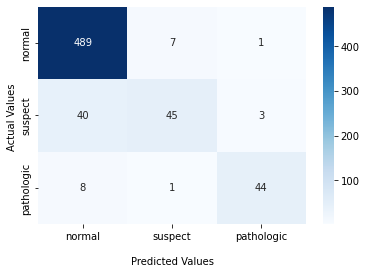



              precision    recall  f1-score   support

           1       0.91      0.98      0.95       497
           2       0.85      0.51      0.64        88
           3       0.92      0.83      0.87        53

    accuracy                           0.91       638
   macro avg       0.89      0.78      0.82       638
weighted avg       0.90      0.91      0.90       638
 

****************************** RandomForestClassifier ******************************



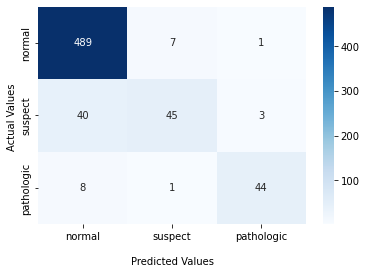



              precision    recall  f1-score   support

           1       0.91      0.98      0.95       497
           2       0.85      0.51      0.64        88
           3       0.92      0.83      0.87        53

    accuracy                           0.91       638
   macro avg       0.89      0.78      0.82       638
weighted avg       0.90      0.91      0.90       638
 

****************************** SVC ******************************



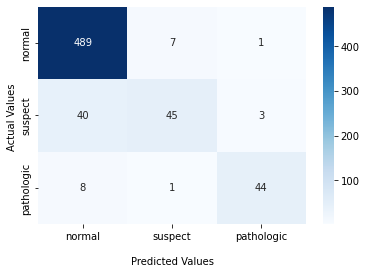



              precision    recall  f1-score   support

           1       0.91      0.98      0.95       497
           2       0.85      0.51      0.64        88
           3       0.92      0.83      0.87        53

    accuracy                           0.91       638
   macro avg       0.89      0.78      0.82       638
weighted avg       0.90      0.91      0.90       638
 



In [186]:
dc_clf = tree.DecisionTreeClassifier()
rnd_clf=RandomForestClassifier()
svm_clf=SVC()

# training and testing CTG meachine only data with the classifiers

for clf in (dc_clf, rnd_clf, svm_clf):#, xgb_clf):

    clf.fit(X_train, y_train)# fitting original imbalanced without expert data
    y_pred2 = clf.predict(X_test)
    
    print("******************************",clf.__class__.__name__,"******************************\n")
    
    cf_matrix = confusion_matrix(y_test,y_pred)
    ax = sns.heatmap(cf_matrix, annot=True, fmt='g', ax=None, cmap='Blues')
    #ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['normal', 'suspect','pathologic'])
    ax.yaxis.set_ticklabels(['normal', 'suspect','pathologic'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()
    print("\n")
    
    #print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    #print(clf.__class__.__name__, recall_score(y_test,y_pred,average="weighted"))
    #print(clf.__class__.__name__, precision_score(y_test,y_pred,average='weighted'))
    print( classification_report(y_test,y_pred),"\n")   